In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [209]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [210]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [211]:
#for line in boston.DESCR.split('\n'):
 #   print(line)

In [212]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X = reduce_mem_usage(X)
X.head(4)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.9%


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94


In [213]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


In [214]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613523,11.363636,11.136797,0.069170,0.554696,6.284636,68.574921,3.795043,9.549407,408.237152,18.455584,356.674561,12.653064
std,8.601545,23.322390,6.860355,0.253993,0.115878,0.702617,28.148869,2.105711,8.707269,168.537170,2.164946,91.294838,7.141063
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [215]:
feature_names = X.columns.tolist()

In [217]:
y = pd.DataFrame(boston.target, columns = ['price'])
y.head(4)

,price
0,24.0
1,21.6
2,34.7
3,33.4


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

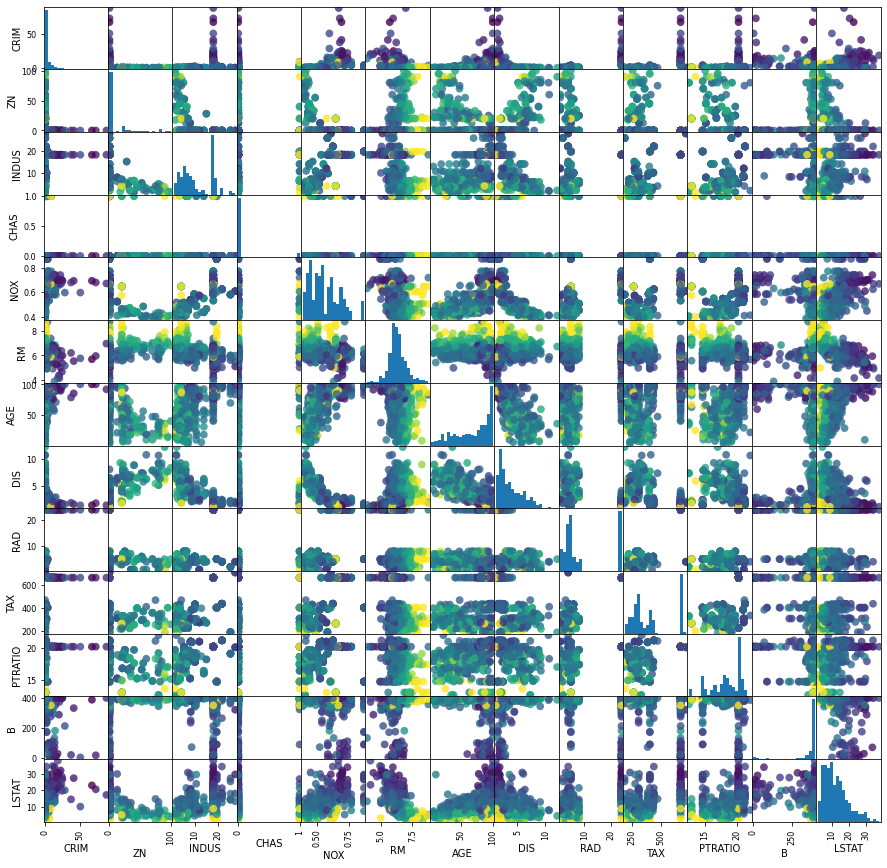

In [237]:
boston_train = pd.DataFrame(X_train, columns = boston.feature_names)
boston_sm = pd.plotting.scatter_matrix(boston_train, c = y_train['price'], figsize=(15,15), 
                                 marker = 'o', hist_kwds={'bins': 20}, 
                                 s=60, alpha=0.8)

In [219]:
scaler = StandardScaler()

In [220]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [221]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [222]:
X_train_scaled.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413159,-0.278089,-0.157234,-0.680086,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637177,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868192,1.525387
4,-0.325282,-0.500320,-0.413159,-0.278089,-0.157234,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379120,-0.165787


In [223]:
X_test_scaled.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373039
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245587,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912


In [224]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float32
 1   ZN       404 non-null    float32
 2   INDUS    404 non-null    float32
 3   CHAS     404 non-null    float32
 4   NOX      404 non-null    float32
 5   RM       404 non-null    float32
 6   AGE      404 non-null    float32
 7   DIS      404 non-null    float32
 8   RAD      404 non-null    float32
 9   TAX      404 non-null    float32
 10  PTRATIO  404 non-null    float32
 11  B        404 non-null    float32
 12  LSTAT    404 non-null    float32
dtypes: float32(13)
memory usage: 20.6 KB


In [226]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state=42)

In [230]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

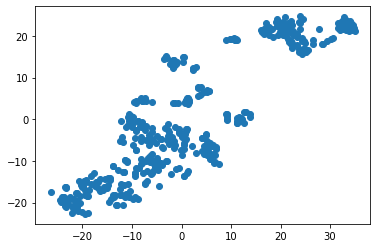

In [231]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [239]:
model = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

In [244]:
train_labels = model.fit_predict(X_train_scaled)

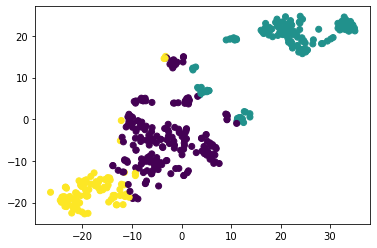

In [245]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = train_labels)

In [291]:
for i in [0, 1, 2]:
    print('price по кластеру 'f'{i}'': ' f'{y_train[train_labels == i].mean()}')
    print('CRIM по кластеру 'f'{i}:', X_train.loc[train_labels == i, 'CRIM'].mean())

price по кластеру 0: price    24.971204
dtype: float64
CRIM по кластеру 0: 0.4209856688976288
price по кластеру 1: price    16.179688
dtype: float64
CRIM по кластеру 1: 10.715219497680664
price по кластеру 2: price    27.874118
dtype: float64
CRIM по кластеру 2: 0.07211847603321075


### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [296]:
test_labels = model.predict(X_test_scaled)

In [297]:
for i in [0, 1, 2]:
    print('price по кластеру 'f'{i}'': ' f'{y_test[test_labels == i].mean()}')
    print('CRIM по кластеру 'f'{i}:', X_test.loc[test_labels == i, 'CRIM'].mean())

price по кластеру 0: price    21.926087
dtype: float64
CRIM по кластеру 0: 0.27973610162734985
price по кластеру 1: price    16.437143
dtype: float64
CRIM по кластеру 1: 10.165532112121582
price по кластеру 2: price    28.947619
dtype: float64
CRIM по кластеру 2: 0.08071999996900558
